In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

warnings.filterwarnings('ignore')


In [2]:
#Load the data
job = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/job_title_des.csv')
resume = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/UpdatedResumeDataSet_with_extracted_text.csv')

In [3]:
pd.set_option('max_colwidth', 800)

In [4]:
# ! pip install PyPDF2
# ! pip install pdfplumber

In [5]:
resume.head()

,Category,Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\..."
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen..."
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering Manipal Institute of Technology\r\nJanuary 2015 D..."
3,Data Science,"Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 mo..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridabad, Haryana\r\nData Science internship \r\n\r\n\r\nSkill Details \r\nData Structure- Exprience - Less than 1 year months\r\nC- Exprience - Less than 1 year months\r\nData Analysis- Exprience - Less than 1 year months\r\nPython- Exprience - Less than 1 year months\r\nCore Java- Exprience - Less than 1 year months\r\nDatabase Management- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Itechpower\r\ndescription -"


In [6]:
resume['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [7]:
resume['Category'] = resume['Category'].str.lower()

In [8]:
job.head()

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19"
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n\nResponsibilities\n\nWe are looking for a capable data scientist to join the Analytics team, reporting locally in India Bangalore. This person’s responsibilities include research, design and development of Machine Learning and Deep Learning algorithms to tackle a variety of Fraud oriented challenges. The data scientist will work closely with software engineers and program managers to deliver end-to-end products, including: data collection in big scale and analysis, exploring different algorithmic approaches, model development, assessment and validation – all the way through production.\n\nQualifications\n\nAt least 3 years of hands-on development of complex Machine Learning models using modern frameworks and tools, ideally Python based.\nS..."
3,3,iOS Developer,"JOB DESCRIPTION:\n\nStrong framework outside of iOS is always a plus\n\niOS experience and generalist engineers with backgrounds in related technologies is a plus\n\nA disciplined approach to development, documentation and file structure\n\nStrong visual design sense and excellent taste\n\nA constant desire to improve, learn more and take things higher\n\nAn excellent understanding of networking, mobile network issues, concurrency and threading\n\nExperience working with internationalized apps\n\nRESPONSIBILITIES\nDesign and build advanced applications for the iOS platform.\nCollaborate with cross-functional teams to define, design, and ship new features..\nWork on bug fixing and improving application performance.\nContinuously discover, evaluate, and implement new technologies to maxi..."
4,4,Full Stack Developer,job responsibility full stack engineer – react role make impact petsmart transforming engineering team meet need rapidly changing retail environment role foundational helping build craft petsmart ’ prowess making react j native key framework across mobile web property working across web mobile application part building amazing mobile first customer experience impact customer store digital channel goal responsibility include act full stack developer across petsmart ’ various web mobile solution full stack engineer help build petsmart ’ competency using react j native across mobile web property partner web engineering team strategy share component across application best practice new advancement react community work product ux team review design concept offer suggestion decrease complexi...


By peeking into the text, we notice that there are non-alphanumeric characters, numbers, and backslashes that need to be cleaned in the text.

In [9]:
job = job.drop(columns=['Unnamed: 0'])

In [10]:
job.head()

,Job Title,Job Description
0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19"
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.
2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n\nResponsibilities\n\nWe are looking for a capable data scientist to join the Analytics team, reporting locally in India Bangalore. This person’s responsibilities include research, design and development of Machine Learning and Deep Learning algorithms to tackle a variety of Fraud oriented challenges. The data scientist will work closely with software engineers and program managers to deliver end-to-end products, including: data collection in big scale and analysis, exploring different algorithmic approaches, model development, assessment and validation – all the way through production.\n\nQualifications\n\nAt least 3 years of hands-on development of complex Machine Learning models using modern frameworks and tools, ideally Python based.\nS..."
3,iOS Developer,"JOB DESCRIPTION:\n\nStrong framework outside of iOS is always a plus\n\niOS experience and generalist engineers with backgrounds in related technologies is a plus\n\nA disciplined approach to development, documentation and file structure\n\nStrong visual design sense and excellent taste\n\nA constant desire to improve, learn more and take things higher\n\nAn excellent understanding of networking, mobile network issues, concurrency and threading\n\nExperience working with internationalized apps\n\nRESPONSIBILITIES\nDesign and build advanced applications for the iOS platform.\nCollaborate with cross-functional teams to define, design, and ship new features..\nWork on bug fixing and improving application performance.\nContinuously discover, evaluate, and implement new technologies to maxi..."
4,Full Stack Developer,job responsibility full stack engineer – react role make impact petsmart transforming engineering team meet need rapidly changing retail environment role foundational helping build craft petsmart ’ prowess making react j native key framework across mobile web property working across web mobile application part building amazing mobile first customer experience impact customer store digital channel goal responsibility include act full stack developer across petsmart ’ various web mobile solution full stack engineer help build petsmart ’ competency using react j native across mobile web property partner web engineering team strategy share component across application best practice new advancement react community work product ux team review design concept offer suggestion decrease complexi...


In [11]:
job['Job Title'] = job['Job Title'].str.lower()

In [12]:
resume.shape

(3446, 2)

In [13]:
job.shape

(2277, 2)

In [14]:
resume.columns , job.columns

(Index(['Category', 'Resume'], dtype='object'),
 Index(['Job Title', 'Job Description'], dtype='object'))

In [15]:
resume.Category.value_counts()

Category
sales                        156
hr                           154
arts                         139
advocate                     138
information-technology       120
business-development         120
engineering                  118
accountant                   118
chef                         118
finance                      118
fitness                      117
aviation                     117
healthcare                   115
consultant                   115
banking                      115
construction                 112
public-relations             111
designer                     107
teacher                      102
apparel                       97
digital-media                 96
java developer                84
testing                       70
agriculture                   63
devops engineer               55
python developer              48
web designing                 45
hadoop                        42
blockchain                    40
etl developer                 40
o

In [16]:
job.rename(columns={'Job Title': 'Job_title'}, inplace=True)
job.rename(columns={'Job Description': 'Job_description'}, inplace=True)
job.Job_title.value_counts()

Job_title
javascript developer      166
java developer            161
software engineer         160
node js developer         160
ios developer             159
php developer             156
flutter developer         155
devops engineer           155
django developer          152
machine learning          152
backend developer         147
network administrator     145
database administrator    139
full stack developer      138
wordpress developer       132
Name: count, dtype: int64

In [17]:
len(resume.Category.value_counts()), len(job.Job_title.value_counts())

(45, 15)

* Out of 45 different categories, Sales class is the largest class with 156 resumes, whereas Bpo class is the smallest with only 22 resumes.
* Out of 15 different job categories, JavaScript Developer class is the largest class with 166 posts, whereas Wordpress Developer class is the smallest with only 132 posts.

In [18]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  3446 non-null   object
 1   Resume    3445 non-null   object
dtypes: object(2)
memory usage: 54.0+ KB


In [19]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_title        2277 non-null   object
 1   Job_description  2277 non-null   object
dtypes: object(2)
memory usage: 35.7+ KB


In [20]:
#Handling with null value
resume.isnull().sum() , job.isnull().sum()

(Category    0
 Resume      1
 dtype: int64,
 Job_title          0
 Job_description    0
 dtype: int64)

#### Handle null values

In [21]:
resume['Resume'] = resume['Resume'].fillna("")

In [22]:
job['Job_description'] = job['Job_description'].fillna("")

In [23]:
resume.isnull().sum() , job.isnull().sum()

(Category    0
 Resume      0
 dtype: int64,
 Job_title          0
 Job_description    0
 dtype: int64)

There is no missing value in our datasets which is good for the model.

#### Visualisation

[Text(0.5, 1.0, 'Resume Category')]

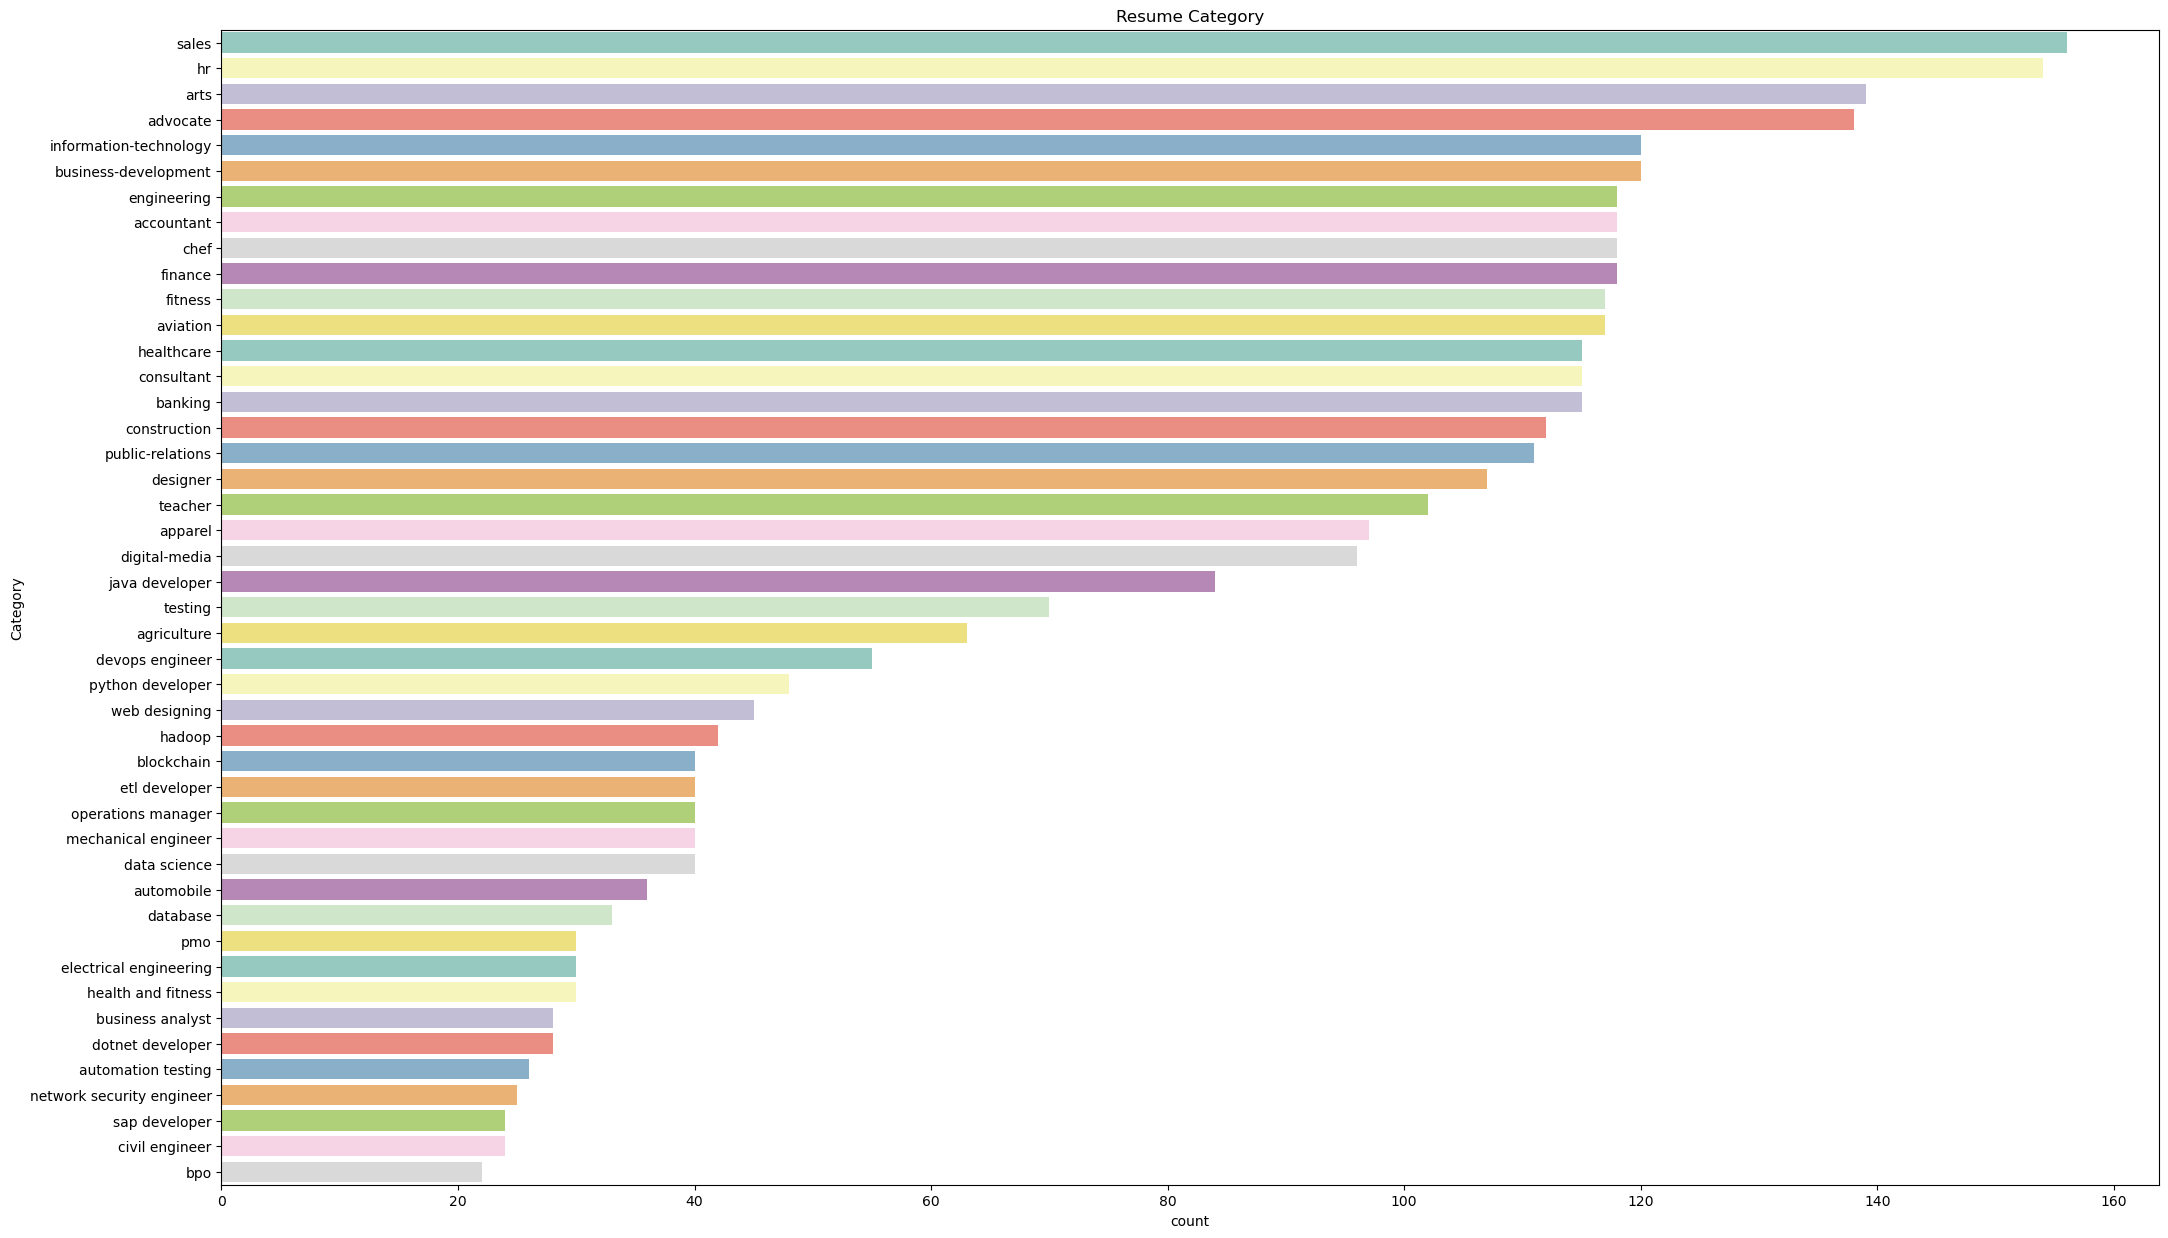

In [24]:
import seaborn as sns
plt.figure(figsize=(25,15))
sns.countplot(y="Category" , palette="Set3", data=resume, order = resume['Category'].value_counts().index).set(title='Resume Category')

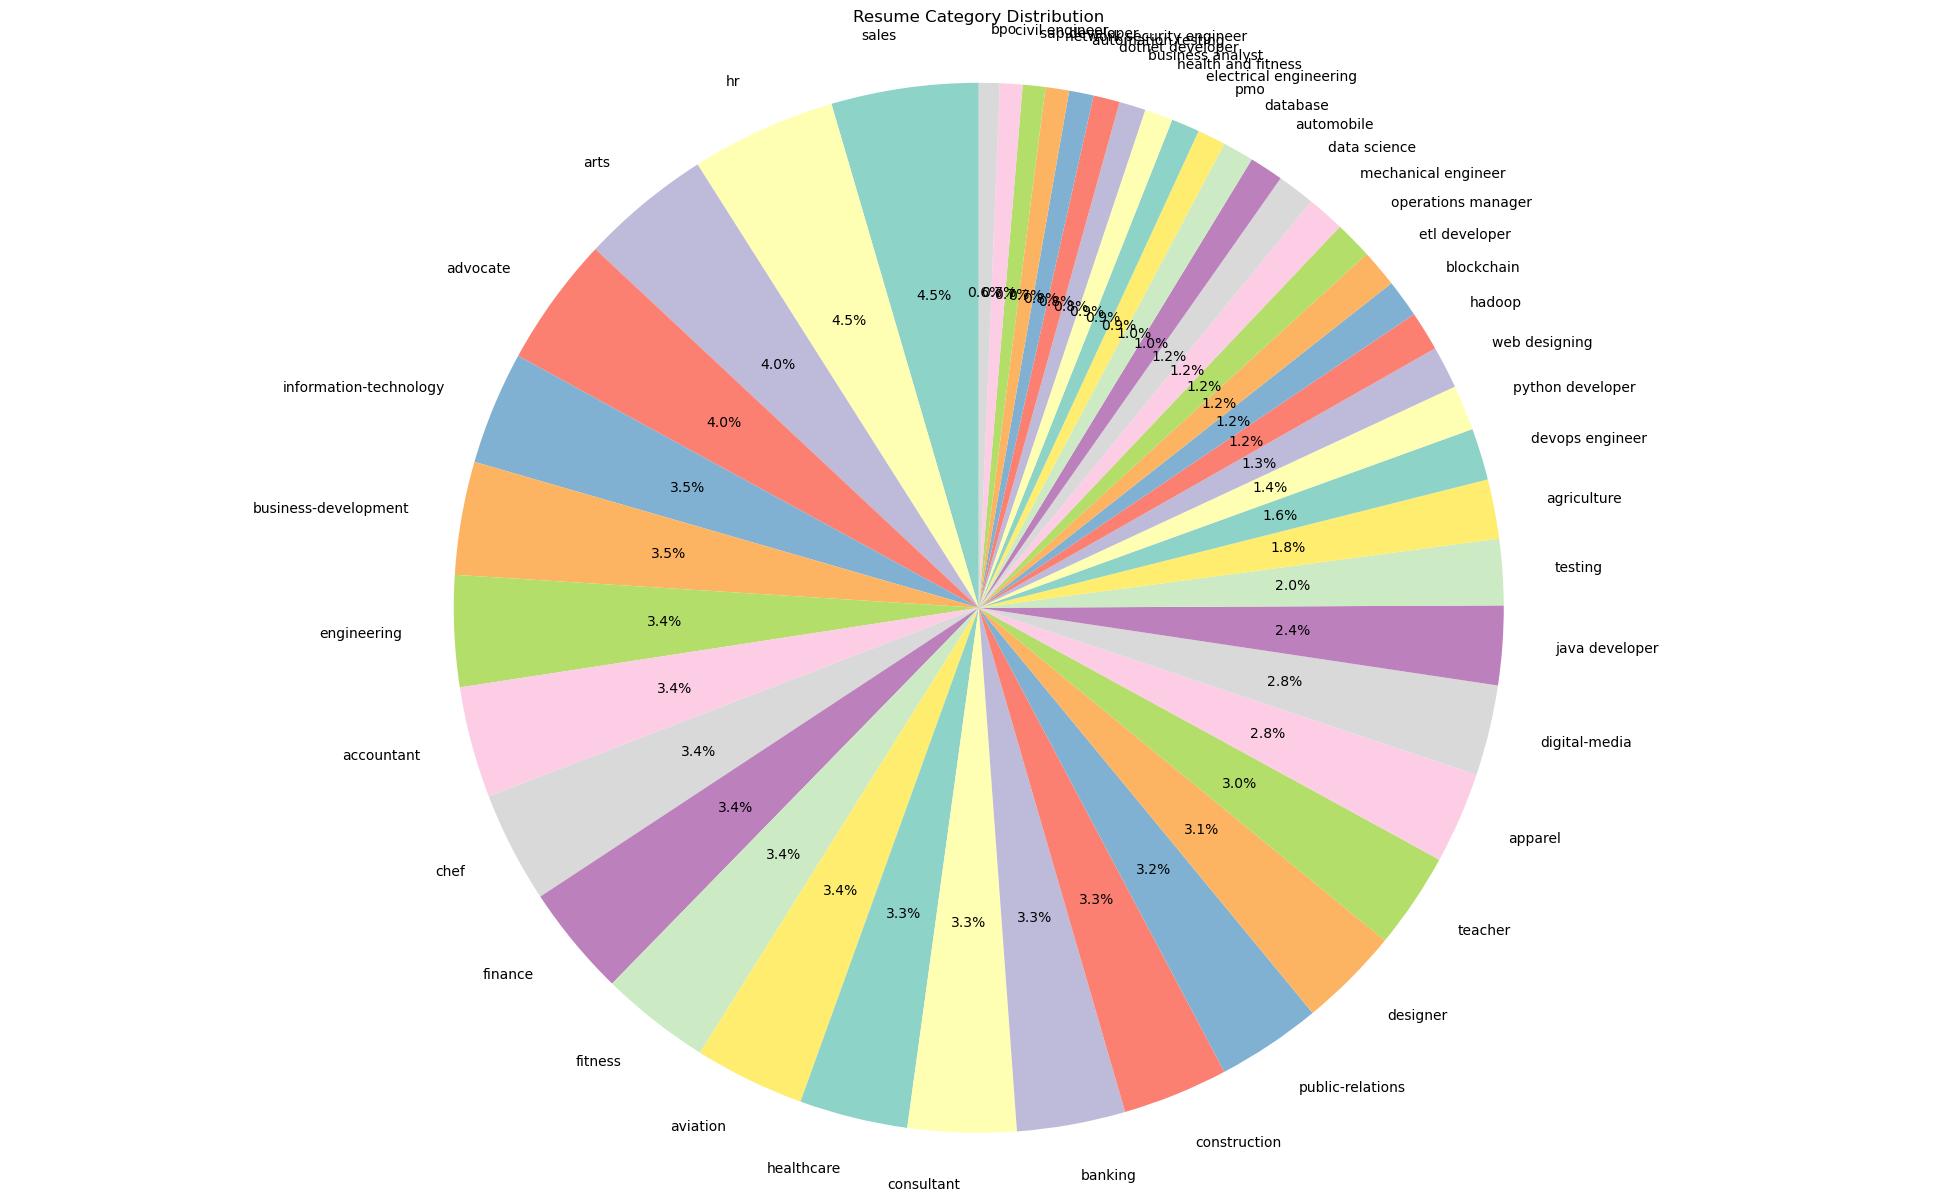

In [25]:
category_counts = resume['Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(25, 15))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(category_counts)), startangle=90)
plt.title('Resume Category Distribution')
plt.axis('equal')
plt.show()

[Text(0.5, 1.0, 'Job Post')]

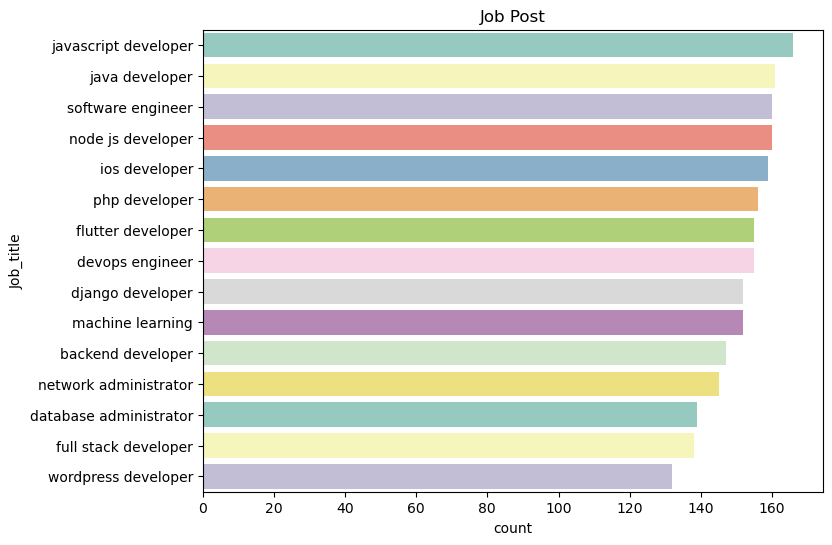

In [26]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(y="Job_title" , palette="Set3", data=job, order = job['Job_title'].value_counts().index).set(title='Job Post')

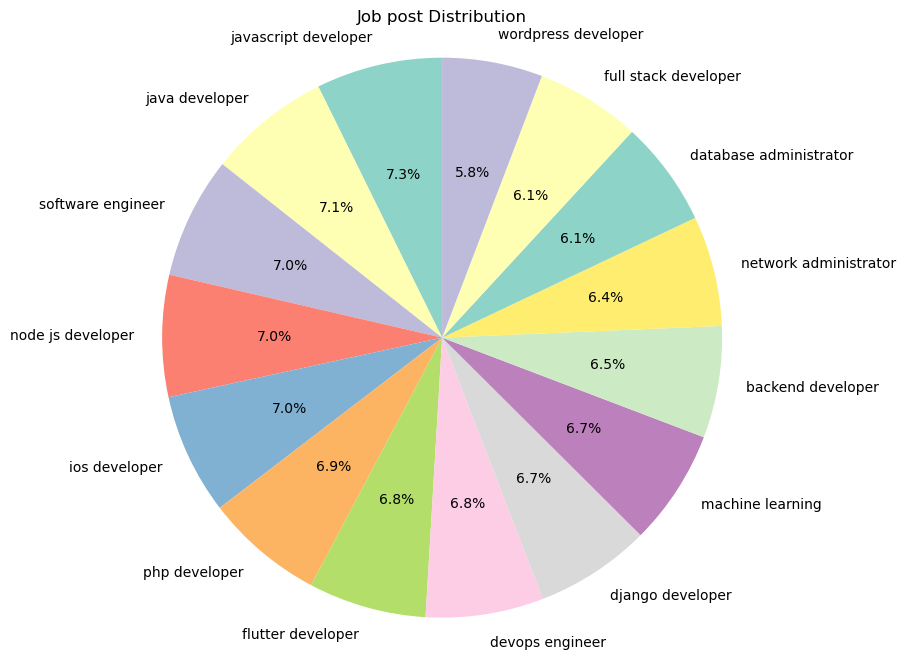

In [27]:
category_counts = job['Job_title'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(category_counts)), startangle=90)
plt.title('Job post Distribution')
plt.axis('equal')
plt.show()

In [28]:
#Review before cleaning
resume["Resume"][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

In [29]:
job["Job_description"][1]

'PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.'

### Text Cleaning

#### Resume

In [30]:
#Print the punctuation
# from string import punctuation
# print(punctuation)

In [31]:
!python -m spacy download en_core_web_sm 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.7 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [32]:
#Clean text and return lowercase
import re

def cleanText(text):

    if not isinstance(text, str):
        return ''

    text = re.sub(r'[^a-zA-Z0-9\s+]', '', text)
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'\d{10,}', '', text) 
    text = re.sub('\s+', ' ', text) #remove extra white space
    return text.lower()

In [33]:
resume['cleaned_resume'] = resume['Resume'].apply(lambda x: cleanText(x))
len(resume['cleaned_resume'][1])

1118

In [34]:
print(resume[['Resume', 'cleaned_resume']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Resume  \
0  Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, D

In [35]:
resume.head()

,Category,Resume,cleaned_resume
0,data science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...",skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 2...
1,data science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...",education details may 2013 to may 2017 be uitrgpv data scientist data scientist matelabs skill details python exprience less than 1 year months statsmodels exprience 12 months aws exprience less than 1 year months machine learning exprience less than 1 year months sklearn exprience less than 1 year months scipy exprience less than 1 year months keras exprience less than 1 year monthscompany details company matelabs description ml platform for business professionals dummies and enthusiasts 60a koramangala 5th block achievementstasks behind sukh sagar bengaluru india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regre...
2,data science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering Manipal

In [36]:
resume.tail()

,Category,Resume,cleaned_resume
3441,automobile,"GENERAL LIABILITY CLAIM REPRESENTATIVE\nSummary\nClaims Representative who is highly motivated, success driven with several years experience in the insurance industry.Â\nSkills\nClaims file management processes\nLitigation resolution\nStrong interpersonal and communication skills\nSelf-directed\nTeam player\nCritical thinker\nExperience\n01/2008 to 02/2013\nGeneral Liability Claim Representative Company Name ï¼​ City , State\nRecognized for continued outstanding customer service - nominated for In-Synch Award Successfully determine coverage and communicate\nwith insured based on application of policy information, facts and allegations of each case.\nAggressively investigate, evaluate, reserve, and negotiate assigned claims in accordance with Best Practices.\nOrganize workflow to mainta...",general liability claim representative summary claims representative who is highly motivated success driven with several years experience in the insurance industry skills claims file management processes litigation resolution strong interpersonal and communication skills selfdirected team player critical thinker experience 012008 to 022013 general liability claim representative company name city state recognized for continued outstanding customer service nominated for insynch award successfully determine coverage and communicate with insured based on application of policy information facts and allegations of each case aggressively investigate evaluate reserve and negotiate assigned claims in accordance with best practices organize workflow to maintain efficiency and productivity recogn...
3442,automobile,"AUTOMOBILE TRANSPORTER\nProfessional Summary\nDedicated, responsible Class A driver with a clean driver's license. Self-motivated and customer-focused.Exceptional leader talented at leadership,\ncommunication, and management skills. Excellent team player with over 20 years of experience in the military and trucking industry.Talented\nMechanist Tech with more than 8 years of experience developing and executing maintenance programs. Excellent troubleshooting skills. Areas of\nexpertise include mechanics, technology, and management.\nKey Skills\nQuality control Solid communication skills\nOSHA regulatory compliance Strong organizational skills\nDependable independent worker Strong work ethic\nClean D.O.T. Team player\nGood at following instructions Timely project completion\nWork Experien...",automobile transporter professional summary dedicated responsible class a driver with a clean drivers license selfmotivated and customerfocusedexceptional leader talented at leadership communication and management skills excellent team player with over 20 years of experience in the military and trucking industrytalented mechanist tech with more than 8 years of experience developing and executing maintenance programs excellent troubleshooting skills areas of expertise include mechanics technology and management key skills quality control solid communication skills osha regulatory compliance strong organizational skills dependable independent worker strong work ethic clean dot team player good at following instructions timely project completion work experience 052014 current company name...
3443,automobile,"Highlights\nProg. Languages: C (5+ yrs), Python (3+ yrs), Java (3+ yrs), MATLAB (Simulink) (5+ yrs), R (2 yrs), Processing (2yrs), SQL(4+ yrs),\nPLC(2 yrs)\nDoc. Editing: Word/PPT/Excel, Pages/Numbers/Keynote, LATEX\nMechanical Design: AutoCAD (6 yrs), Solidworks (5+ yrs)\nMechanical Skills: MakerBot 3D print, Laser cut, Mill, Drill, Lathe Machine.\nStatistics Softwares: STATA, SPSS\nDatabase Softwares: SQL Server (4 yrs), Navicat (2 yrs)\nOperating Systems: Windows 7/10, OS X\nExperience\nCompany Name June 2016 to Current R&D Product Development Engineer\nCity\nDesign and build a tail-sitter VTOL(vertical take off and landing) UAV(unmanned aerial vehicle) which.\ntakes off and lands vertically and travels

In [37]:
resume['cleaned_resume'] = resume['cleaned_resume'].apply(lambda x: word_tokenize(x))

resume.head(2)

,Category,Resume,cleaned_resume
0,data science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...","[skills, programming, languages, python, pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learning, regression, svm, nave, bayes, knn, random, forest, decision, trees, boosting, techniques, cluster, analysis, word, embedding, sentiment, analysis, natural, language, processing, dimensionality, reduction, topic, modelling, lda, nmf, pca, neural, nets, database, visualizations, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, others, regular, expression, html, css, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, and, understanding, of, deep, learningeducation, details, data, science, assurance, associate, data, science, assurance, associate, ernst, young, llp..."
1,data science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...","[education, details, may, 2013, to, may, 2017, be, uitrgpv, data, scientist, data, scientist, matelabs, skill, details, python, exprience, less, than, 1, year, months, statsmodels, exprience, 12, months, aws, exprience, less, than, 1, year, months, machine, learning, exprience, less, than, 1, year, months, sklearn, exprience, less, than, 1, year, months, scipy, exprience, less, than, 1, year, months, keras, exprience, less, than, 1, year, monthscompany, details, company, matelabs, description, ml, platform, for, business, professionals, dummies, and, enthusiasts, 60a, koramangala, 5th, block, achievementstasks, behind, sukh, sagar, bengaluru, india, developed, and, deployed, auto, preprocessing, steps, of, machine, learning, mainly, missing, value, treatment, outlier, detection, ...]"


In [38]:
DOMAIN_SPECIFIC_STOPWORDS = ['resume', 'job', 'candidate', 'apply', 'experience', 'skills']
stop_words = set(stopwords.words('english')).union(DOMAIN_SPECIFIC_STOPWORDS)

def remove_stopwords_from_tokens(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [39]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'apply',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'candidate',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'experience',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'job',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ou

In [40]:
len(stop_words)

185

In [41]:
resume['cleaned_resume'] = resume['cleaned_resume'].apply(lambda x: remove_stopwords_from_tokens(x))

In [42]:
resume.head(2)

,Category,Resume,cleaned_resume
0,data science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...","[programming, languages, python, pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learning, regression, svm, nave, bayes, knn, random, forest, decision, trees, boosting, techniques, cluster, analysis, word, embedding, sentiment, analysis, natural, language, processing, dimensionality, reduction, topic, modelling, lda, nmf, pca, neural, nets, database, visualizations, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, others, regular, expression, html, css, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, understanding, deep, learningeducation, details, data, science, assurance, associate, data, science, assurance, associate, ernst, young, llp, skill, details,..."
1,data science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...","[education, details, may, 2013, may, 2017, uitrgpv, data, scientist, data, scientist, matelabs, skill, details, python, exprience, less, 1, year, months, statsmodels, exprience, 12, months, aws, exprience, less, 1, year, months, machine, learning, exprience, less, 1, year, months, sklearn, exprience, less, 1, year, months, scipy, exprience, less, 1, year, months, keras, exprience, less, 1, year, monthscompany, details, company, matelabs, description, ml, platform, business, professionals, dummies, enthusiasts, 60a, koramangala, 5th, block, achievementstasks, behind, sukh, sagar, bengaluru, india, developed, deployed, auto, preprocessing, steps, machine, learning, mainly, missing, value, treatment, outlier, detection, encoding, scaling, feature, selection, dimensionality, reduction, dep..."


In [43]:
# Lemmatise the tokens
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 10000000

def lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))

    return [token.lemma_ for token in doc]

In [44]:
resume['cleaned_resume'] = resume['cleaned_resume'].apply(lambda x: lemmatize_tokens(x))

In [45]:
resume.head(2)

,Category,Resume,cleaned_resume
0,data science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...","[programming, language, python, pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learn, regression, svm, nave, baye, knn, random, forest, decision, tree, boost, technique, cluster, analysis, word, embed, sentiment, analysis, natural, language, process, dimensionality, reduction, topic, model, lda, nmf, pca, neural, net, database, visualization, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, other, regular, expression, html, css, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, understand, deep, learningeducation, detail, datum, science, assurance, associate, datum, science, assurance, associate, ernst, young, llp, skill, detail, javascript, exprience, 24,..."
1,data science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...","[education, detail, may, 2013, may, 2017, uitrgpv, data, scientist, data, scientist, matelabs, skill, detail, python, exprience, less, 1, year, month, statsmodels, exprience, 12, month, aw, exprience, less, 1, year, month, machine, learn, exprience, less, 1, year, month, sklearn, exprience, less, 1, year, month, scipy, exprience, less, 1, year, month, keras, exprience, less, 1, year, monthscompany, detail, company, matelab, description, ml, platform, business, professional, dummy, enthusiast, 60a, koramangala, 5th, block, achievementstask, behind, sukh, sagar, bengaluru, india, develop, deploy, auto, preprocessing, step, machine, learn, mainly, miss, value, treatment, outli, detection, encode, scale, feature, selection, dimensionality, reduction, deploy, automate, classification, regre..."


In [46]:
def join_tokens_to_string(tokens):
    return ' '.join(tokens)

resume['cleaned_resume'] = resume['cleaned_resume'].apply(join_tokens_to_string)

In [47]:
resume.head(2)

,Category,Resume,cleaned_resume
0,data science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...",programming language python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learn regression svm nave baye knn random forest decision tree boost technique cluster analysis word embed sentiment analysis natural language process dimensionality reduction topic model lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau other regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understand deep learningeducation detail datum science assurance associate datum science assurance associate ernst young llp skill detail javascript exprience 24 month jquery exprience 24 month python exprience 24 monthscompany detail company ernst young ...
1,data science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...",education detail may 2013 may 2017 uitrgpv data scientist data scientist matelabs skill detail python exprience less 1 year month statsmodels exprience 12 month aw exprience less 1 year month machine learn exprience less 1 year month sklearn exprience less 1 year month scipy exprience less 1 year month keras exprience less 1 year monthscompany detail company matelab description ml platform business professional dummy enthusiast 60a koramangala 5th block achievementstask behind sukh sagar bengaluru india develop deploy auto preprocessing step machine learn mainly miss value treatment outli detection encode scale feature selection dimensionality reduction deploy automate classification regression model linkedincominadityarathore b4600b146 reasearch deploy time series forecasting model ar...


In [48]:
# Join all resumes into a single large string for word cloud generation

resumes_text = ' '.join(resume['cleaned_resume'])

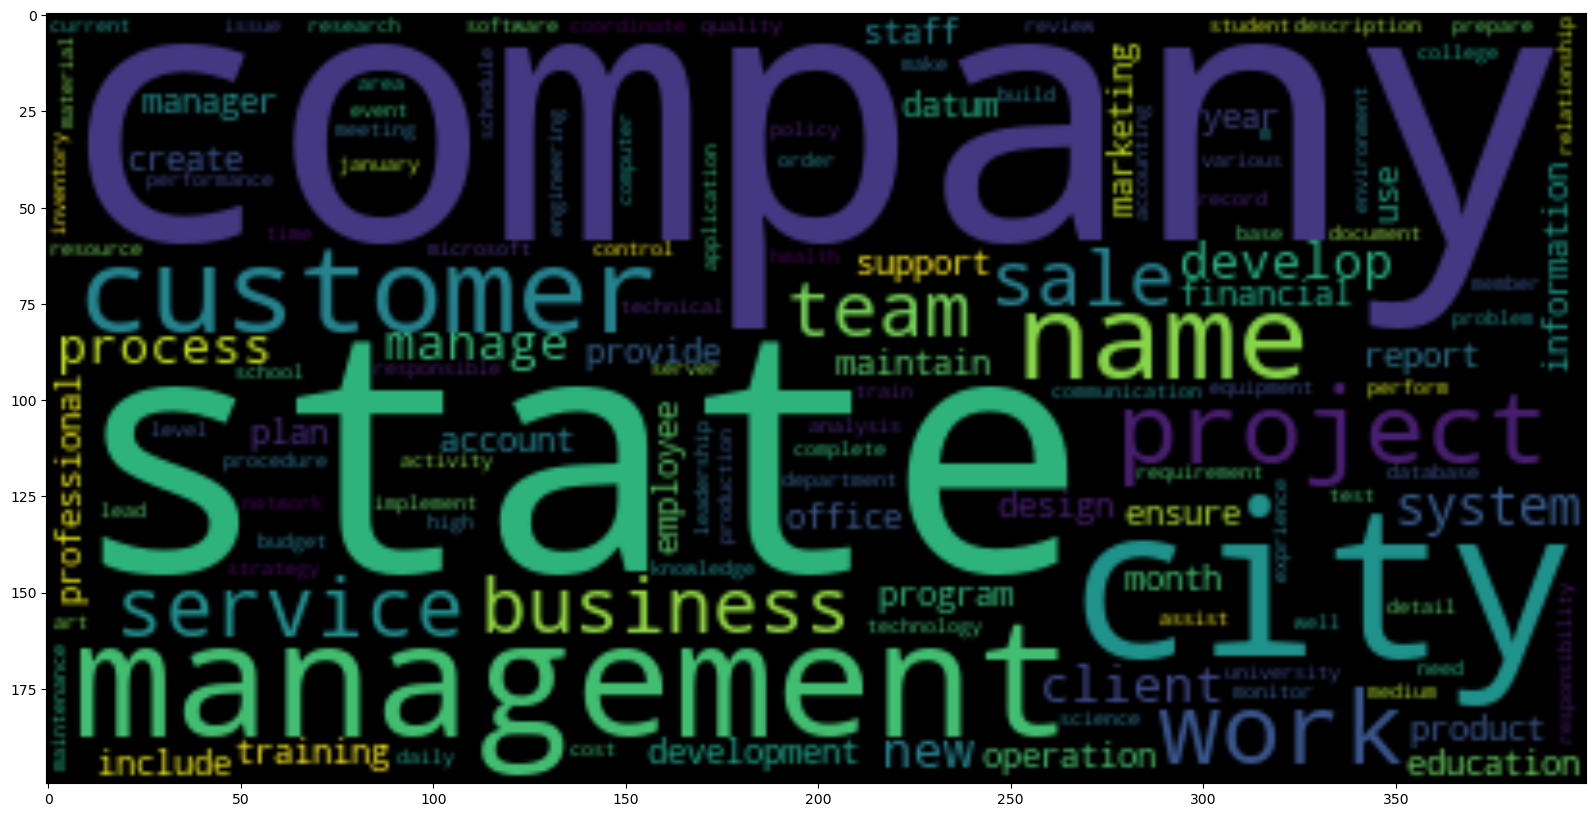

In [49]:
from wordcloud import WordCloud
wordcloudimage = WordCloud( font_step=2 ,
max_font_size=500,
collocations = False,

collocation_threshold = 1
).generate(resumes_text)
plt.figure(figsize=(25, 10))
plt.imshow(wordcloudimage, interpolation='bilinear')
# plt.axis("off")
plt.show()

As we can see, we already remove the word 'experience' from our tokens but it still appear in the image. The reason is because it is incorrect spelling 'exprience'.

In [50]:
text ="modelling"
doc=nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: modelling, Lemma: model


In [51]:
text ="visualisation"
doc=nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: visualisation, Lemma: visualisation


In [52]:
# resume['cleaned_resume'] = resume['cleaned_resume'].fillna("")

##### Save Cleaned Resume

In [53]:
resume_cleaned = resume[['Category','cleaned_resume']]

In [54]:
resume_cleaned.to_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_resume.csv', index=False)

In [55]:
df = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_resume.csv')

print(df.isnull().sum())

Category          0
cleaned_resume    1
dtype: int64


### Job

In [56]:
job['cleaned_job'] = job['Job_description'].apply(lambda x: cleanText(x))

In [57]:
job.head(2)

,Job_title,Job_description,cleaned_job
0,flutter developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19",we are looking for hire experts flutter developer so you are eligible this post then apply your resume job types fulltime parttime salary 2000000 4000000 per month benefits flexible schedule food allowance schedule day shift supplemental pay joining bonus overtime pay experience total work 1 year preferred housing rent subsidy yes industry software development work remotely temporarily due to covid19
1,django developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,pythondjango developerlead job codepdj 04 strong python experience in api development restrpc experience working with api frameworks djangoflask experience evaluating and improving the efficiency of programs in a linux environment ability to effectively handle multiple tasks with a high level of accuracy and attention to detail good verbal and written communication skills working knowledge of sql json experience preferred good knowledge in automated unit testing using pyunit


In [58]:
job.tail(2)

,Job_title,Job_description,cleaned_job
2275,machine learning,"Key Responsibilities: Team leads for small or module leads for large teams. Responsible for delivery of assigned module/ components /phases of a project.Responsible for people Management, including goal setting and providing performance feedback.Responsible for Status reporting .Responsible for Knowledge transfer and arriving at SLAs for steady state.Technical problem solving skills. Job Requirement and Skills Has a good practical understanding of technology and its application. Good grasp of technology and tools used for development. Good design skills and architectural skills in the technical area.Fair amount of domain expertise gained through working on the application or certification programs (if working in a vertical).Good understanding of the sphere of activities in a horizontal...",key responsibilities team leads for small or module leads for large teams responsible for delivery of assigned module components phases of a projectresponsible for people management including goal setting and providing performance feedbackresponsible for status reporting responsible for knowledge transfer and arriving at slas for steady statetechnical problem solving skills job requirement and skills has a good practical understanding of technology and its application good grasp of technology and tools used for development good design skills and architectural skills in the technical areafair amount of domain expertise gained through working on the application or certification programs if working in a verticalgood understanding of the sphere of activities in a horizontal domain anticipa...
2276,full stack developer,leslie hindman auctioneer one nation 's leading fastest growing fine art auction house looking add full stack ruby rail software developer chicago office position developer part small growing team including chief technology officer focused building new software platform manage auction business successful candidate responsible aspect development database architecture feature building testing _we 're looking someone ... _ thrives working engineer collaborating big project also comfortable working autonomously get communication transparency key success solves problem flex adapts quickly get excited art design _and someone ha ... _ bachelor 's degree computer science engineering preferred required 3+ year front backend development experience solid knowledge experience ruby rail vue react a...,leslie hindman auctioneer one nation s leading fastest growing fine art auction house looking add full stack ruby rail software developer chicago office position developer part small growing team including chief technology officer focused building new software platform manage auction business successful candidate responsible aspect development database architecture feature building testing we re looking someone thrives working engineer collaborating big project also comfortable working autonomously get communication transparency key success solves problem flex adapts quickly get excited art design and someone ha bachelor s degree computer science engineering preferred required 3+ year front backend development experience solid knowledge experience ruby rail vue react angular comfortabl...


In [59]:
job['cleaned_job'] = job['cleaned_job'].apply(lambda x: word_tokenize(x))

In [60]:
job.head(2)

,Job_title,Job_description,cleaned_job
0,flutter developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19","[we, are, looking, for, hire, experts, flutter, developer, so, you, are, eligible, this, post, then, apply, your, resume, job, types, fulltime, parttime, salary, 2000000, 4000000, per, month, benefits, flexible, schedule, food, allowance, schedule, day, shift, supplemental, pay, joining, bonus, overtime, pay, experience, total, work, 1, year, preferred, housing, rent, subsidy, yes, industry, software, development, work, remotely, temporarily, due, to, covid19]"
1,django developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,"[pythondjango, developerlead, job, codepdj, 04, strong, python, experience, in, api, development, restrpc, experience, working, with, api, frameworks, djangoflask, experience, evaluating, and, improving, the, efficiency, of, programs, in, a, linux, environment, ability, to, effectively, handle, multiple, tasks, with, a, high, level, of, accuracy, and, attention, to, detail, good, verbal, and, written, communication, skills, working, knowledge, of, sql, json, experience, preferred, good, knowledge, in, automated, unit, testing, using, pyunit]"


In [61]:
job['cleaned_job'] = job['cleaned_job'].apply(lambda x: remove_stopwords_from_tokens(x))

In [62]:
job.head(2)

,Job_title,Job_description,cleaned_job
0,flutter developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19","[looking, hire, experts, flutter, developer, eligible, post, types, fulltime, parttime, salary, 2000000, 4000000, per, month, benefits, flexible, schedule, food, allowance, schedule, day, shift, supplemental, pay, joining, bonus, overtime, pay, total, work, 1, year, preferred, housing, rent, subsidy, yes, industry, software, development, work, remotely, temporarily, due, covid19]"
1,django developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,"[pythondjango, developerlead, codepdj, 04, strong, python, api, development, restrpc, working, api, frameworks, djangoflask, evaluating, improving, efficiency, programs, linux, environment, ability, effectively, handle, multiple, tasks, high, level, accuracy, attention, detail, good, verbal, written, communication, working, knowledge, sql, json, preferred, good, knowledge, automated, unit, testing, using, pyunit]"


In [63]:
job['cleaned_job'] = job['cleaned_job'].apply(lambda x: lemmatize_tokens(x))

In [64]:
job.head(2)

,Job_title,Job_description,cleaned_job
0,flutter developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19","[look, hire, expert, flutter, developer, eligible, post, type, fulltime, parttime, salary, 2000000, 4000000, per, month, benefit, flexible, schedule, food, allowance, schedule, day, shift, supplemental, pay, join, bonus, overtime, pay, total, work, 1, year, prefer, housing, rent, subsidy, yes, industry, software, development, work, remotely, temporarily, due, covid19]"
1,django developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,"[pythondjango, developerlead, codepdj, 04, strong, python, api, development, restrpc, work, api, framework, djangoflask, evaluate, improve, efficiency, program, linux, environment, ability, effectively, handle, multiple, task, high, level, accuracy, attention, detail, good, verbal, write, communication, work, knowledge, sql, json, prefer, good, knowledge, automate, unit, testing, use, pyunit]"


In [65]:
job['cleaned_job'] = job['cleaned_job'].apply(join_tokens_to_string)

job.head(2)

,Job_title,Job_description,cleaned_job
0,flutter developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19",look hire expert flutter developer eligible post type fulltime parttime salary 2000000 4000000 per month benefit flexible schedule food allowance schedule day shift supplemental pay join bonus overtime pay total work 1 year prefer housing rent subsidy yes industry software development work remotely temporarily due covid19
1,django developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,pythondjango developerlead codepdj 04 strong python api development restrpc work api framework djangoflask evaluate improve efficiency program linux environment ability effectively handle multiple task high level accuracy attention detail good verbal write communication work knowledge sql json prefer good knowledge automate unit testing use pyunit


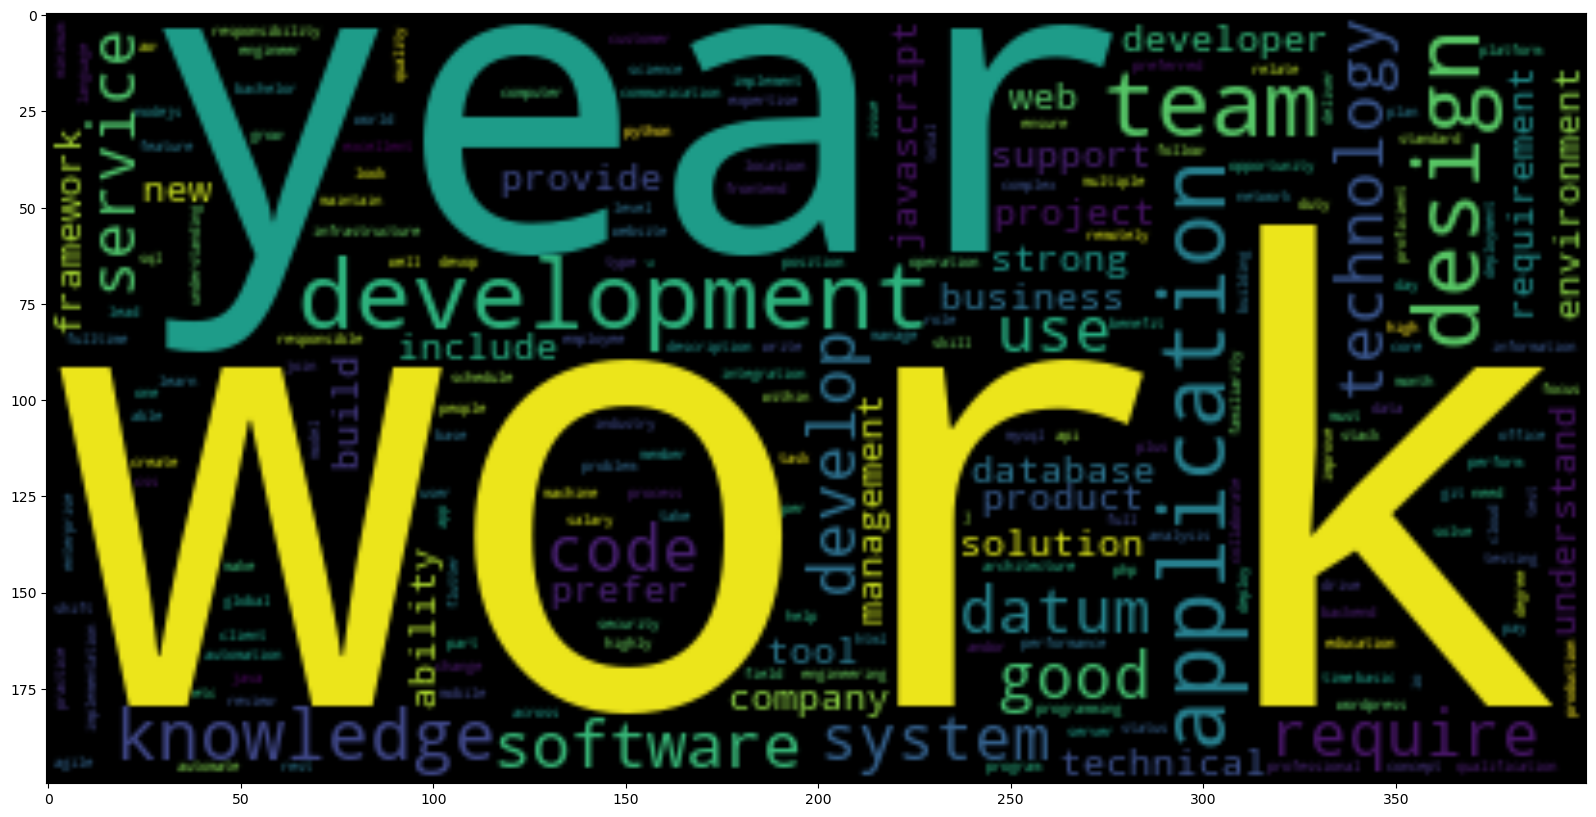

In [66]:
job_text = ' '.join(job['cleaned_job'])

wordcloudimage = WordCloud( font_step=2 ,
max_font_size=500,
collocations = False,

collocation_threshold = 1
).generate(job_text)
plt.figure(figsize=(25, 10))
plt.imshow(wordcloudimage, interpolation='bilinear')
# plt.axis("off")
plt.show()

##### Save file

In [67]:
job_cleaned = job[['Job_title','cleaned_job']]

In [68]:
job_cleaned.to_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_job.csv', index=False)